In [3]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Действие №1

Париснг данных

In [47]:
headers = {
    'accept': '*/*',
    'accept-language': 'ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7',
    'origin': 'https://www.wildberries.ru',
    'priority': 'u=1, i',
    'referer': 'https://www.wildberries.ru/catalog/elektronika/smartfony-i-telefony/aksessuary-dlya-smartfonov',
    'sec-ch-ua': '"Chromium";v="128", "Not;A=Brand";v="24", "Opera GX";v="114"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'cross-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36 OPR/114.0.0.0',
    'x-captcha-id': 'Catalog 1|1|1735223901|AA==|4e3b96d249c34102a37b7a317695ead7|hM0tb4Sd3Af6osXSspdUTRyMnCxweLhRQNeecIlPCkl',
}

params = {
    'ab_testing': 'false',
    'appType': '1',
    'cat': '128550',
    'curr': 'rub',
    'dest': '-1257786',
    'hide_dtype': '10',
    'lang': 'ru',
    'sort': 'popular',
    'spp': '30',
}

response = requests.get('https://catalog.wb.ru/catalog/electronic20/v2/catalog', params=params, headers=headers)
with open('data.json', 'w', encoding='utf-8') as file:
    json.dump(response.json(), file)

### Действие №2

Отбор нужных данных

In [45]:
with open("data.json", 'r') as file:
    data = json.load(file)
data

data_raw = data.get('data',{}).get('products', None)
products = []
if data_raw and len(data_raw) > 0:
    for product in data_raw:
        products.append({
            'brand': product.get('brand', None),
            'entity': product.get('entity', None),
            'name': product.get('name', None),
            'id': product.get('id', None),
            'supplier': product.get('supplier', None),
            'feedbacks': product.get('feedbacks', None),
            'rating': product.get('reviewRating', None),
            'price': (product.get('sizes', None)[0].get('price', None).get('total', None))/100,
            'quantity': product.get('totalQuantity', None)
        })
products = pd.DataFrame(products)
products

,brand,entity,name,id,supplier,feedbacks,rating,price,quantity
0,BASEUS,Адаптеры,Автомобильный Bluetooth адаптер Bluetooth AUX ...,41520660,"ООО ""РЕТЕЙЛ""",74,4.3,446.0,18
1,GSTAR,Кабели,Y-коннектор разветвитель RCA 1папа-2мама,96899103,GSTAR,1171,4.7,182.0,121
2,VAmobile,Зарядные устройства,Зарядка в прикуриватель в машину разветвитель ...,48285309,VAmobile,375,4.5,287.0,189
3,MetStoreForYou,Кабели,"Зарядка type-c для телефона, кабель 3 в 1",153571531,3in1,3054,4.5,198.0,6
4,Borofone,Кабели,Кабель USB Lightning для iphone шнур для айфон,70654893,Bobr.My.Shop,1679,4.8,246.0,44
...,...,...,...,...,...,...,...,...,...
95,STIMAXON,Кабели,Провод usb type c для зарядки телефона,134332815,STIMAXON,109036,4.7,313.0,16583
96,GCR,Кабели,Зарядный шнур Type C Type C 1м,228669814,Партнёр GCR,21,4.4,396.0,19
97,,Кабели,Кабель для lphone USB Lightning для зарядки те...,264177269,Мазманова Бела Артюшовна,9351,4.8,315.0,9531
98,Cosmo Group,Кабели,Кабель для зарядки type-c,287188648,Магазин стильных товаров,1757,4.8,75.0,13518


### Действие №3

Отчистка данных

In [46]:
products_sort = products.drop_duplicates(subset=['name'])

Q1 = products_sort['price'].quantile(0.25)
Q3 = products_sort['price'].quantile(0.75)
IQR = Q3 - Q1
products_scatter = products_sort[(products_sort['price'] >= Q1 - 1.5 * IQR) & (products_sort['price'] <= Q3 + 1.5 * IQR)]

Q1 = products_scatter['feedbacks'].quantile(0.25)
Q3 = products_scatter['feedbacks'].quantile(0.75)
IQR = Q3 - Q1
products_scatter = products_scatter[(products_scatter['feedbacks'] >= Q1 - 1.5 * IQR) & (products_scatter['feedbacks'] <= Q3 + 1.5 * IQR)]

products_scatter = products_scatter[(products_scatter['rating'] >= 3)]

products_scatter.index = range(len(products_scatter))
# mean_price = products_sort['price'].mean()
# std_price = products_sort['price'].std()

# products_sort = products_sort[(products_sort['price'] >= mean_price - 3 * std_price) & (products_sort['price'] <= mean_price + 3 * std_price)]

# mean_price = products_sort['feedbacks'].mean()
# std_price = products_sort['feedbacks'].std()

#products_sort = products_sort[(products_sort['feedbacks'] >= mean_price - 3 * std_price) & (products_sort['feedbacks'] <= mean_price + 3 * std_price)]

products_sort.index = range(len(products_sort))
products_sort

,brand,entity,name,id,supplier,feedbacks,rating,price,quantity
0,BASEUS,Адаптеры,Автомобильный Bluetooth адаптер Bluetooth AUX ...,41520660,"ООО ""РЕТЕЙЛ""",74,4.3,446.0,18
1,GSTAR,Кабели,Y-коннектор разветвитель RCA 1папа-2мама,96899103,GSTAR,1171,4.7,182.0,121
2,VAmobile,Зарядные устройства,Зарядка в прикуриватель в машину разветвитель ...,48285309,VAmobile,375,4.5,287.0,189
3,MetStoreForYou,Кабели,"Зарядка type-c для телефона, кабель 3 в 1",153571531,3in1,3054,4.5,198.0,6
4,Borofone,Кабели,Кабель USB Lightning для iphone шнур для айфон,70654893,Bobr.My.Shop,1679,4.8,246.0,44
...,...,...,...,...,...,...,...,...,...
89,STIMAXON,Кабели,Провод usb type c для зарядки телефона,134332815,STIMAXON,109036,4.7,313.0,16583
90,GCR,Кабели,Зарядный шнур Type C Type C 1м,228669814,Партнёр GCR,21,4.4,396.0,19
91,,Кабели,Кабель для lphone USB Lightning для зарядки те...,264177269,Мазманова Бела Артюшовна,9351,4.8,315.0,9531
92,Cosmo Group,Кабели,Кабель для зарядки type-c,287188648,Магазин стильных товаров,1757,4.8,75.0,13518


### Действие №4

Визуализация данных

Топ 10 карточек по количеству отзывов

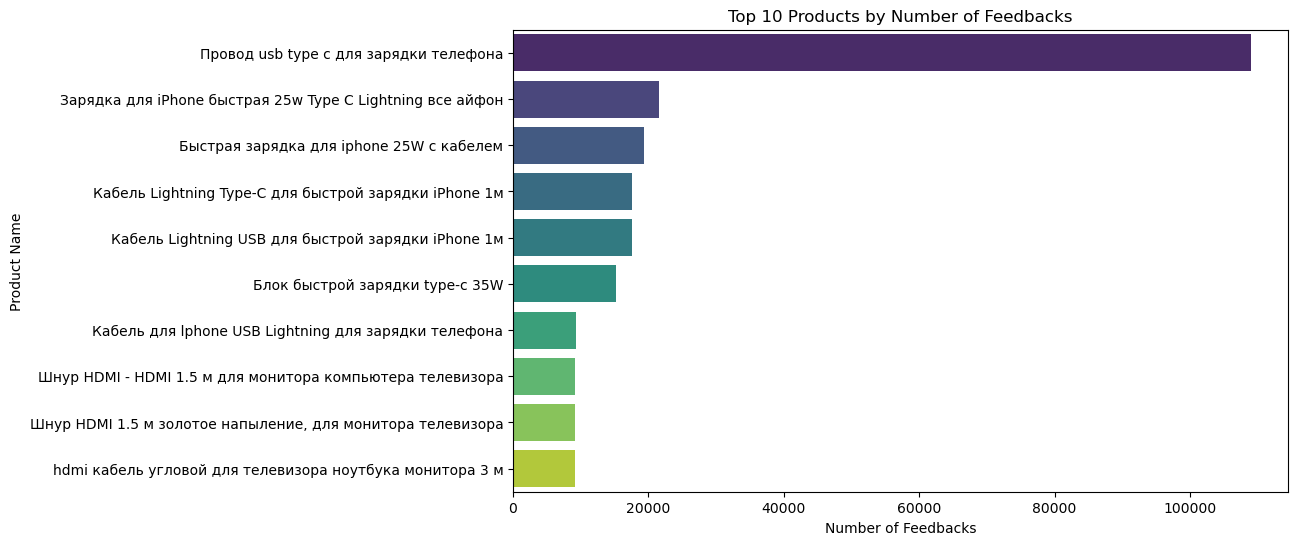

In [47]:
top_10_products = products_sort.sort_values(by='feedbacks', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='feedbacks', y='name', data=top_10_products, palette='viridis')
plt.title('Top 10 Products by Number of Feedbacks')
plt.xlabel('Number of Feedbacks')
plt.ylabel('Product Name')
plt.show()

Топ товаров по количеству отзывов

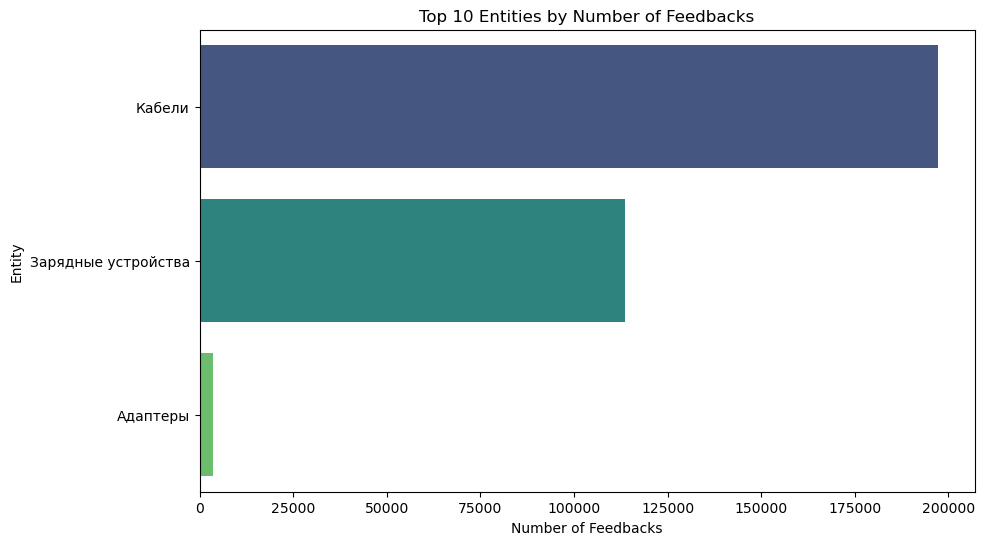

In [ ]:
entity_feedback_counts = products.groupby('entity')['feedbacks'].sum().reset_index()
top_10_entities = entity_feedback_counts.sort_values(by='feedbacks', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='feedbacks', y='entity', data=top_10_entities, palette='viridis')
plt.title('Top 10 Entities by Number of Feedbacks')
plt.xlabel('Number of Feedbacks')
plt.ylabel('Entity')
plt.show()

 Scatter plot распределения рейтинга от количества отзывов

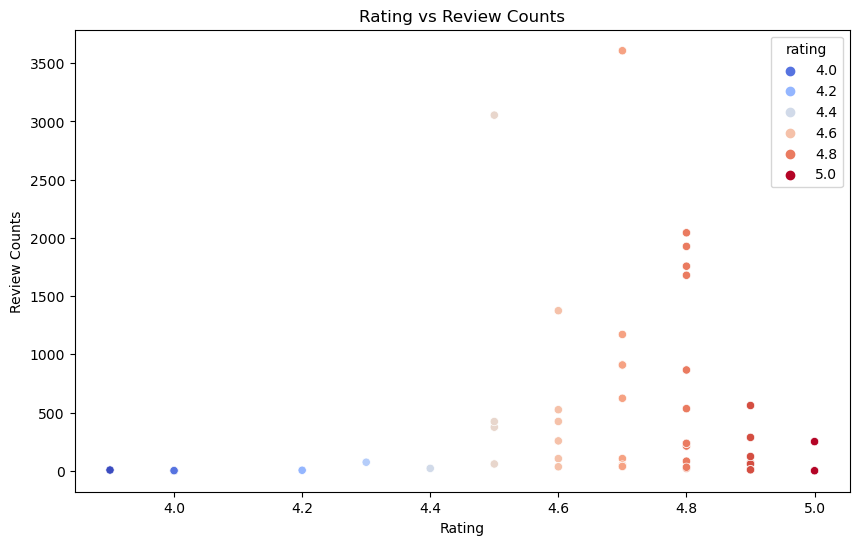

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='feedbacks', x='rating', data=products_scatter, hue='rating', palette='coolwarm')
plt.title('Rating vs Review Counts')
plt.xlabel('Rating')
plt.ylabel('Review Counts')
plt.show()

 Scatter plot распределения цены от рейтинга

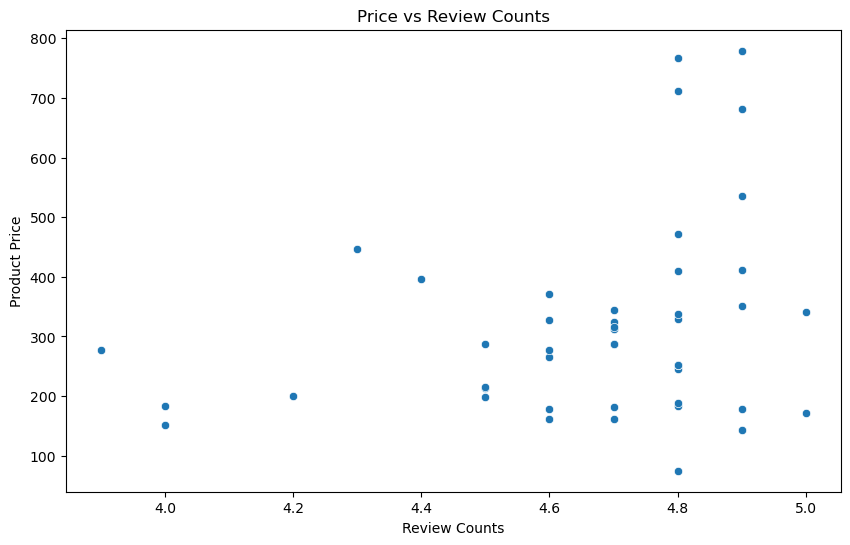

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='price', data=products_scatter)
plt.title('Price vs Review Counts')
plt.xlabel('Review Counts')
plt.ylabel('Product Price')
plt.show()

Логарифмическая шкала для распределения количества отзывов

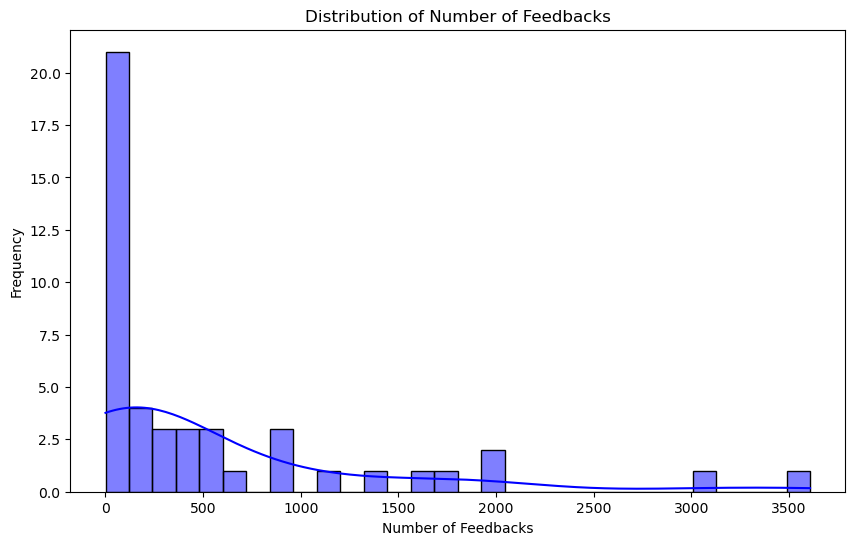

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(products_scatter['feedbacks'], bins=30, kde=True, color='blue')
plt.title('Distribution of Number of Feedbacks')
plt.xlabel('Number of Feedbacks')
plt.ylabel('Frequency')
plt.show()

Pie chart для отображения процента продавцов на маркетплейсе

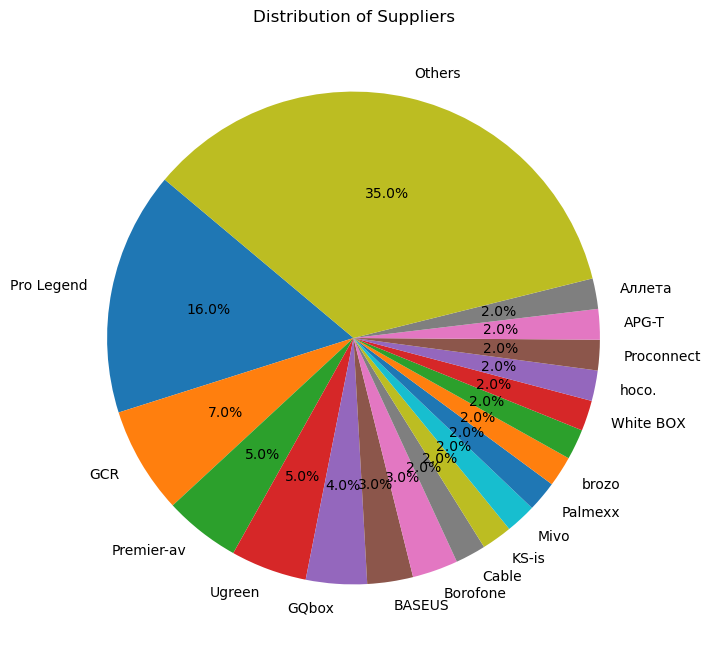

In [54]:
supplier_counts = products['brand'].value_counts()

threshold = 0.01 
others_count = supplier_counts[supplier_counts / supplier_counts.sum() <= threshold].sum()
main_suppliers = supplier_counts[supplier_counts / supplier_counts.sum() > threshold]

main_suppliers['Others'] = others_count

plt.figure(figsize=(8, 8))
plt.pie(main_suppliers, labels=main_suppliers.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Suppliers')
plt.show()